In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv('/kaggle/input/ev-dataset/EV data.csv').drop(labels=['Unnamed: 0'], axis=1)
original_data.head(10)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,220,No,FWD,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,164,420,No,FWD,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,193,540,Yes,AWD,Type 2 CCS,SUV,D,5,55000


In [3]:
df = original_data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [5]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


In [6]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [7]:
print(df['RapidCharge'].unique())
print(df['PowerTrain'].unique())
print(df['PlugType'].unique())
print(df['BodyStyle'].unique())
print(df['Segment'].unique())
print(df['Seats'].unique())

['Yes' 'No']
['AWD' 'RWD' 'FWD']
['Type 2 CCS' 'Type 2 CHAdeMO' 'Type 2' 'Type 1 CHAdeMO']
['Sedan' 'Hatchback' 'Liftback' 'SUV' 'Pickup' 'MPV' 'Cabrio' 'SPV'
 'Station']
['D' 'C' 'B' 'F' 'A' 'E' 'N' 'S']
[5 4 7 6 2]


In [8]:
df.loc[df['Segment'] == 'S']

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
51,Tesla,Roadster,2.1,410,970,206,920,Yes,AWD,Type 2 CCS,Cabrio,S,4,215000


In [9]:
a = df[df['Segment'] == 'A']['BodyStyle'].value_counts()
print('Number of bodystyle in A:',a)
b = df[df['Segment'] == 'B']['BodyStyle'].value_counts()
print('Number of bodystyle in B:',b)
c = df[df['Segment'] == 'C']['BodyStyle'].value_counts()
print('Number of bodystyle in C:',c)
d = df[df['Segment'] == 'D']['BodyStyle'].value_counts()
print('Number of bodystyle in D:',d)
e = df[df['Segment'] == 'E']['BodyStyle'].value_counts()
print('Number of bodystyle in E:',e)
f = df[df['Segment'] == 'F']['BodyStyle'].value_counts()
print('Number of bodystyle in F:',f)
n = df[df['Segment'] == 'N']['BodyStyle'].value_counts()
print('Number of bodystyle in N:',n)
s = df[df['Segment'] == 'S']['BodyStyle'].value_counts()
print('Number of bodystyle in S:',s)

Number of bodystyle in A: BodyStyle
Hatchback    6
Cabrio       1
Name: count, dtype: int64
Number of bodystyle in B: BodyStyle
Hatchback    11
SUV           9
MPV           1
Cabrio        1
Name: count, dtype: int64
Number of bodystyle in C: BodyStyle
Hatchback    15
SUV          14
Liftback      1
Name: count, dtype: int64
Number of bodystyle in D: BodyStyle
SUV         10
Sedan        4
Liftback     1
Name: count, dtype: int64
Number of bodystyle in E: BodyStyle
SUV    10
Name: count, dtype: int64
Number of bodystyle in F: BodyStyle
Sedan       6
Liftback    3
SUV         2
Station     1
Name: count, dtype: int64
Number of bodystyle in N: BodyStyle
Pickup    3
SPV       3
Name: count, dtype: int64
Number of bodystyle in S: BodyStyle
Cabrio    1
Name: count, dtype: int64


In [10]:
df['RapidCharge'] = df['RapidCharge'].map({'Yes': 1, 'No': 0})
df['PowerTrain'] = df['PowerTrain'].map({'AWD': 1, 'RWD': 2, 'FWD': 3})
df['PlugType'] = df['PlugType'].map({'Type 1 CHAdeMO': 1, 'Type 2': 2,'Type 2 CCS': 3, 'Type 2 CHAdeMO': 4})
df['BodyStyle'] = df['BodyStyle'].map({'Sedan': 1, 'Hatchback': 2, 'Liftback': 3, 'SUV': 4, 'Pickup': 5, 'MPV': 6,
                                        'Cabrio': 7, 'SPV': 8, 'Station': 9})
df['Segment'] = df['Segment'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'N': 7, 'S': 8})
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,1,3,1,4,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,2,3,2,3,5,30000
2,Polestar,2,4.7,210,400,181,620,1,1,3,3,4,5,56440
3,BMW,iX3,6.8,180,360,206,560,1,2,3,4,4,5,68040
4,Honda,e,9.5,145,170,168,190,1,2,3,2,2,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,3,3,2,3,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,1,3,4,5,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,1,3,2,3,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,1,3,2,3,5,65000


In [11]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,1,3,1,4,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,2,3,2,3,5,30000
2,Polestar,2,4.7,210,400,181,620,1,1,3,3,4,5,56440
3,BMW,iX3,6.8,180,360,206,560,1,2,3,4,4,5,68040
4,Honda,e,9.5,145,170,168,190,1,2,3,2,2,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,3,3,2,3,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,1,3,4,5,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,1,3,2,3,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,1,3,2,3,5,65000


In [12]:
df.drop(columns=['Brand', 'Model'], inplace=True)
df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,450,161,940,1,1,3,1,4,5,55480
1,10.0,160,270,167,250,0,2,3,2,3,5,30000
2,4.7,210,400,181,620,1,1,3,3,4,5,56440
3,6.8,180,360,206,560,1,2,3,4,4,5,68040
4,9.5,145,170,168,190,1,2,3,2,2,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160,330,191,440,1,3,3,2,3,5,45000
99,4.5,210,335,258,540,1,1,3,4,5,5,96050
100,5.9,200,325,194,440,1,1,3,2,3,5,50000
101,5.1,200,375,232,450,1,1,3,2,3,5,65000


In [13]:
df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,450,161,940,1,1,3,1,4,5,55480
1,10.0,160,270,167,250,0,2,3,2,3,5,30000
2,4.7,210,400,181,620,1,1,3,3,4,5,56440
3,6.8,180,360,206,560,1,2,3,4,4,5,68040
4,9.5,145,170,168,190,1,2,3,2,2,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160,330,191,440,1,3,3,2,3,5,45000
99,4.5,210,335,258,540,1,1,3,4,5,5,96050
100,5.9,200,325,194,440,1,1,3,2,3,5,50000
101,5.1,200,375,232,450,1,1,3,2,3,5,65000


In [14]:
corr = df.corr()
corr

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.733559,-0.292518,0.676835,-0.259657,0.180027,-0.451568,-0.175335,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.785218,0.220113,-0.688241,-0.010110,-0.013161,0.670403,0.126470,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.723714,0.251910,-0.552582,0.131297,0.081783,0.628597,0.300163,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.321925,0.013894,-0.464711,-0.028761,0.384014,0.623263,0.301230,0.396705
FastCharge_KmH,-0.733559,0.785218,0.723714,0.321925,1.000000,0.225863,-0.677523,0.111936,-0.090269,0.613512,0.193364,0.667873
RapidCharge,-0.292518,0.220113,0.251910,0.013894,0.225863,1.000000,-0.128791,0.172397,-0.015650,0.147511,0.196721,0.199737
PowerTrain,0.676835,-0.688241,-0.552582,-0.464711,-0.677523,-0.128791,1.000000,0.106628,0.035974,-0.571649,-0.077079,-0.626164
PlugType,-0.259657,-0.010110,0.131297,-0.028761,0.111936,0.172397,0.106628,1.000000,-0.245886,-0.163959,-0.029570,-0.000193
BodyStyle,0.180027,-0.013161,0.081783,0.384014,-0.090269,-0.015650,0.035974,-0.245886,1.000000,0.315061,0.280572,0.095319
Segment,-0.451568,0.670403,0.628597,0.623263,0.613512,0.147511,-0.571649,-0.163959,0.315061,1.000000,0.416744,0.737106


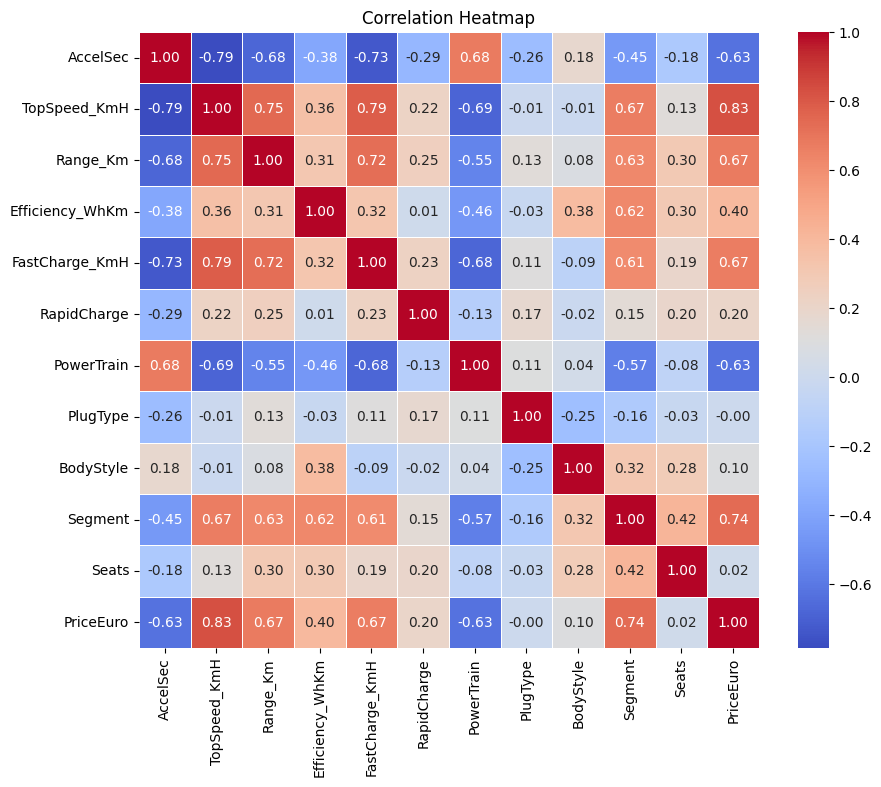

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
most_corr = corr.unstack().sort_values(ascending=False)
most_corr = most_corr[most_corr != 1].drop_duplicates()
print("Most correlated pairs")
print(most_corr.head(5))

least_corr = corr.unstack().sort_values()
least_corr = least_corr[least_corr !=1].drop_duplicates()
print("Least correlated pairs")
print(least_corr.head(5))

Most correlated pairs
TopSpeed_KmH    PriceEuro         0.829057
                FastCharge_KmH    0.785218
                Range_Km          0.746662
PriceEuro       Segment           0.737106
FastCharge_KmH  Range_Km          0.723714
dtype: float64
Least correlated pairs
AccelSec    TopSpeed_KmH     -0.786195
            FastCharge_KmH   -0.733559
PowerTrain  TopSpeed_KmH     -0.688241
            FastCharge_KmH   -0.677523
Range_Km    AccelSec         -0.677062
dtype: float64


In [17]:
#Calculate correlation with target variable
correlation_target = df.corrwith(df['Segment'])

#feature with high correlation
relevant_features = correlation_target[abs(correlation_target) > 0.5].index.tolist()
irrelevant_features = correlation_target[abs(correlation_target) < 0.5].index.tolist()
print(relevant_features)
print(irrelevant_features)

['TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'PowerTrain', 'Segment', 'PriceEuro']
['AccelSec', 'RapidCharge', 'PlugType', 'BodyStyle', 'Seats']


In [18]:
#df.drop(columns=['TopSpeed_KmH','Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'PowerTrain', 'PriceEuro'], inplace=True)
df_mean = df.mean()
print(df_mean)

AccelSec               7.396117
TopSpeed_KmH         179.194175
Range_Km             338.786408
Efficiency_WhKm      189.165049
FastCharge_KmH       444.271845
RapidCharge            0.747573
PowerTrain             1.961165
PlugType               2.922330
BodyStyle              3.339806
Segment                3.621359
Seats                  4.883495
PriceEuro          55811.563107
dtype: float64


In [19]:
df.drop(columns=['Segment'], inplace=True)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Standardize the features
scaler = StandardScaler()
df_scaler = df.copy()
df_scaled = scaler.fit_transform(df)


In [21]:
df_scaler.head(5)

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
0,4.6,233,450,161,940,1,1,3,1,5,55480
1,10.0,160,270,167,250,0,2,3,2,5,30000
2,4.7,210,400,181,620,1,1,3,3,5,56440
3,6.8,180,360,206,560,1,2,3,4,5,68040
4,9.5,145,170,168,190,1,2,3,2,4,32997


In [22]:
df_scaled

array([[-0.93118617,  1.24088078,  0.88686204, ..., -1.40635398,
         0.1471092 , -0.00976088],
       [ 0.86716712, -0.44265992, -0.54853056, ..., -0.80529813,
         0.1471092 , -0.7598663 ],
       [-0.89788333,  0.71045015,  0.48814187, ..., -0.20424228,
         0.1471092 ,  0.01850055],
       ...,
       [-0.49824927,  0.47982813, -0.10993838, ..., -0.80529813,
         0.1471092 , -0.17108654],
       [-0.76467197,  0.47982813,  0.28878179, ..., -0.80529813,
         0.1471092 ,  0.27049828],
       [ 0.03459615,  0.24920612,  0.48814187, ...,  0.39681357,
         0.1471092 ,  0.18218132]])

In [23]:
from sklearn import metrics
from sklearn.cluster import KMeans

# Initialize list to store inertia (sum of squared distances) for different number of clusters
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    #append the values to the list
    inertia.append(kmeans.inertia_)


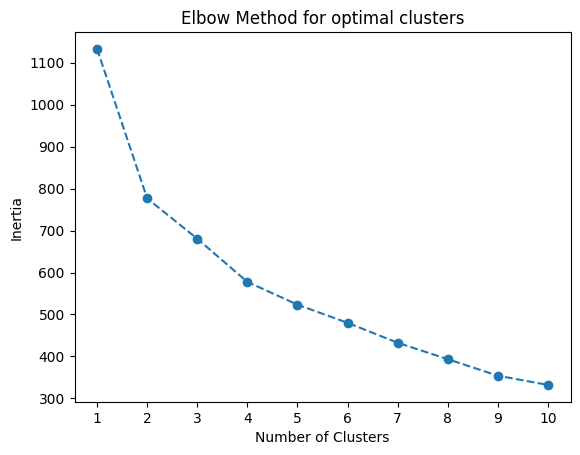

In [24]:
#elbow curve
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title("Elbow Method for optimal clusters")
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [25]:
#This shows that 4 is the optimal number of clusters
clusters = 4

#Perform K-means clustering
kmeans = KMeans(n_clusters=clusters, n_init=10, random_state=42)
df['Segment_new'] = kmeans.fit_predict(df_scaled)

In [26]:
print(df['Segment_new'].unique())

[2 1 0 3]


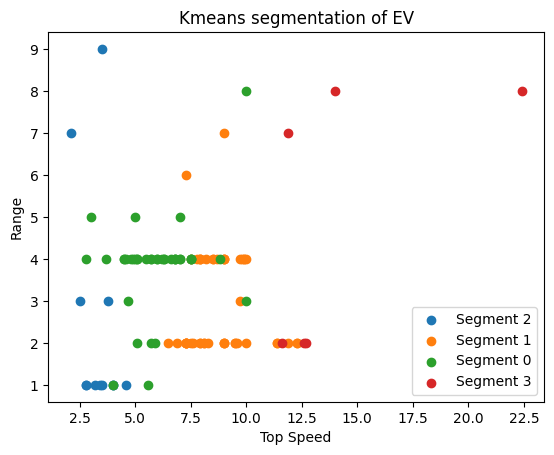

In [27]:
#['AccelSec', 'RapidCharge', 'PlugType', 'BodyStyle', 'Seats']
#Visualize the segments
for segment in df['Segment_new'].unique():
    segment_data = df[df['Segment_new'] == segment]
    plt.scatter(segment_data['AccelSec'], segment_data['BodyStyle'], label=f'Segment {segment}')

plt.xlabel('Top Speed')
plt.ylabel('Range')
plt.title('Kmeans segmentation of EV')
plt.legend()
plt.show()

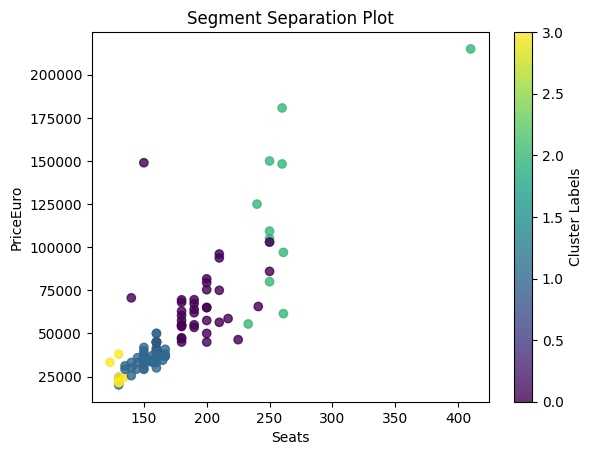

In [28]:
#Visualization part two
plt.scatter(df['TopSpeed_KmH'], df['PriceEuro'], c=df['Segment_new'], cmap='viridis', marker='o', alpha=0.8)
plt.title('Segment Separation Plot')
plt.xlabel('Seats')
plt.ylabel('PriceEuro')
plt.colorbar(label="Cluster Labels")
plt.show()

In [29]:
#Scaling the dataframe for visualizing

features = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm','FastCharge_KmH', 
            'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle','Seats', 'PriceEuro']

#features = ['AccelSec', 'RapidCharge', 'PlugType', 'BodyStyle', 'Seats']


# Scaling selected features
scaler2 = MinMaxScaler()
df_scaler[features] = scaler2.fit_transform(df[features])

df_scaler.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
0,0.123153,0.383275,0.405714,0.337278,1.000000,1.0,0.0,0.666667,0.000,0.6,0.181407
1,0.389163,0.128920,0.200000,0.372781,0.103896,0.0,0.5,0.666667,0.125,0.6,0.050654
2,0.128079,0.303136,0.348571,0.455621,0.584416,1.0,0.0,0.666667,0.250,0.6,0.186334
3,0.231527,0.198606,0.302857,0.603550,0.506494,1.0,0.5,0.666667,0.375,0.6,0.245860
4,0.364532,0.076655,0.085714,0.378698,0.025974,1.0,0.5,0.666667,0.125,0.4,0.066033


In [30]:
df_scaler = pd.merge(df_scaler, df[['Segment_new']], left_index=True, right_index=True)


In [31]:
# Calculate cluster centers (mean values)
cluster_centers = df_scaler.groupby('Segment_new').mean()
cluster_centers

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
Segment_new,,,,,,,,,,,
0,0.188329,0.242652,0.344176,0.627978,0.470196,0.794872,0.141026,0.649573,0.352564,0.666667,0.231194
1,0.330692,0.100970,0.210062,0.398508,0.188312,0.739130,0.869565,0.688406,0.244565,0.547826,0.076558
2,0.061576,0.493322,0.448571,0.533531,0.788961,0.916667,0.000000,0.611111,0.187500,0.483333,0.508337
3,0.596059,0.023229,0.038095,0.446746,0.036797,0.166667,0.666667,0.277778,0.479167,0.400000,0.036985


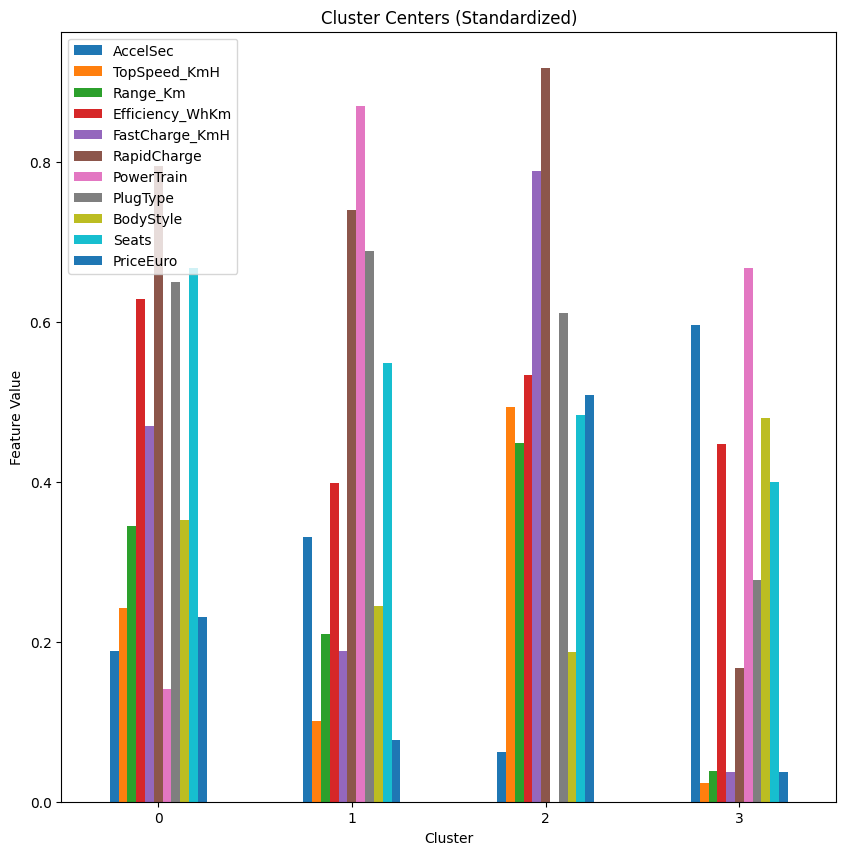

In [32]:
# Visualize cluster centers
cluster_centers.plot(kind='bar', figsize=(10, 10))
plt.title('Cluster Centers (Standardized)')
plt.xlabel('Cluster')
plt.ylabel('Feature Value')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()